# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
# load dataset
df = pd.read_csv("loan_prediction.csv")
# shape of df
df.shape

(614, 13)

In [3]:
assert df.shape == (614, 13)

In [4]:
# head of df
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [5]:
df.drop(columns = "Loan_ID", inplace=True)
df["Loan_Status"] = df["Loan_Status"].astype("category").cat.codes

In [6]:
assert df.shape == (614, 12); 
assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [7]:
percent_missing = df.isnull().sum()
type_column = df.dtypes
unique_values = df.nunique()
uv = list()
str_final = ''

for col in df.columns:
    unique_vals = df[col].unique()
    if df[col].nunique() < 10:
        temp = str(unique_vals).split()
    else:
        temp = str(unique_vals[:20]).split()
    try:
        temp = [e for e in temp if str(e) not in {'[',']','nan]'}]
    except ValueError:
        pass  # do nothing!
    str_final = ' - '.join(temp)
    str_final = str_final.translate({ord(i): None for i in "]['"})
    uv.append(str_final)

In [8]:
stats = pd.DataFrame({'type' : type_column, '#null': percent_missing, '#unique' : unique_values, "unique_values" : uv})
stats.head(100)

,type,#null,#unique,unique_values
Gender,object,13,2,Male - Female
Married,object,3,2,No - Yes
Dependents,object,15,4,0 - 1 - 2 - 3+
Education,object,0,2,Graduate - Not - Graduate
Self_Employed,object,32,2,No - Yes
ApplicantIncome,int64,0,505,5849 - 4583 - 3000 - 2583 - 6000 - 5417 - 2333...
CoapplicantIncome,float64,0,287,0. - 1508. - 2358. - 4196. - 1516. - 2504. - 1...
LoanAmount,float64,22,203,nan - 128. - 66. - 120. - 141. - 267. - 95. - ...
Loan_Amount_Term,float64,14,10,360. - 120. - 240. - nan - 180. - 60. - 300. -...
Credit_History,float64,50,2,1. - 0.


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [9]:
df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace = True)
df = df.dropna()
print(df.shape)

(480, 12)


In [10]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

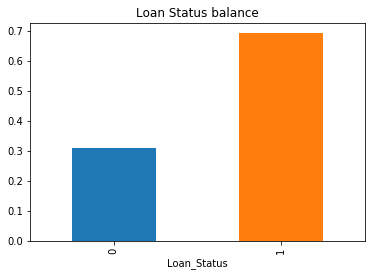

In [11]:
(df.groupby('Loan_Status').size()/df.shape[0]).plot(kind="bar", title="Loan Status balance")

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [12]:
print('Rate (approved loans) : ', df.Loan_Status.mean())
print(df.groupby('Loan_Status').size())

Rate (approved loans) :  0.6916666666666667
Loan_Status
0    148
1    332
dtype: int64


In [13]:
print('We can have an accuracy of 69,17% by always predicting 1')

We can have an accuracy of 69,17% by always predicting 1


6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [14]:
def make_bar_plot(df, column):
    print('barplot')
    height = list()
    bars = list()
    
    for c in df[column].unique():
        print("Number of time value: " + str(c) + " appears in " +str(column) +" is "+ str(len(df[df[column] == c])))
        
        temp = df.loc[df[column] == c]
        temp = temp.loc[df['Loan_Status'] == 1]
        
        print("and the loan was accepted : " +str(temp.shape[0]) +" times for this , the rate is : " +str(temp.shape[0]/len(df[df[column] == c])))
        
        height.append(temp.shape[0]/len(df[df[column] == c]))
        bars.append(c)
            
    y_pos = np.arange(len(bars))
    colors = list('rgbkm')
    # Create horizontal bars
    plt.barh(y_pos, height, color = colors)
 
    # Create names on the y-axis
    plt.yticks(y_pos, bars)
 
    # Show graphic
    plt.show()
    plt.pause(0.0001) 
        

barplot
Number of time value: Rural appears in Property_Area is 139
and the loan was accepted : 85 times for this , the rate is : 0.6115107913669064
Number of time value: Urban appears in Property_Area is 150
and the loan was accepted : 98 times for this , the rate is : 0.6533333333333333
Number of time value: Semiurban appears in Property_Area is 191
and the loan was accepted : 149 times for this , the rate is : 0.7801047120418848


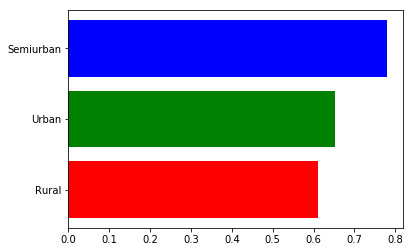

In [15]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [43]:
import time
def make_box_plot(df, column_param):  
    print('boxplot')
    fig = plt.figure()
    ax = df.boxplot(column=column_param, by='Loan_Status')
    plt.show()
    time.sleep(0.1)

boxplot


<Figure size 432x288 with 0 Axes>

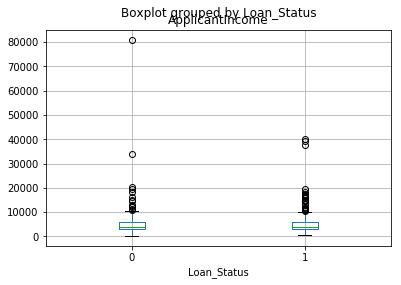

In [44]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

****************** Gender *******************
Other
barplot
Number of time value: 1 appears in Gender is 394
and the loan was accepted : 278 times for this , the rate is : 0.7055837563451777
Number of time value: 0 appears in Gender is 86
and the loan was accepted : 54 times for this , the rate is : 0.627906976744186


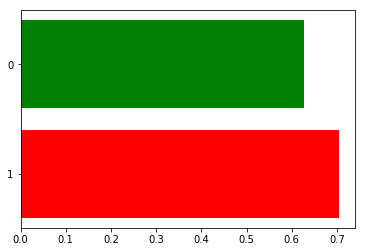

****************** Married *******************
Other
barplot
Number of time value: 1 appears in Married is 311
and the loan was accepted : 227 times for this , the rate is : 0.729903536977492
Number of time value: 0 appears in Married is 169
and the loan was accepted : 105 times for this , the rate is : 0.621301775147929


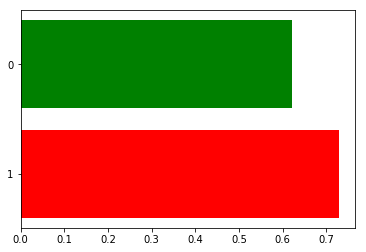

****************** Education *******************
Other
barplot
Number of time value: 0 appears in Education is 383
and the loan was accepted : 271 times for this , the rate is : 0.7075718015665796
Number of time value: 1 appears in Education is 97
and the loan was accepted : 61 times for this , the rate is : 0.6288659793814433


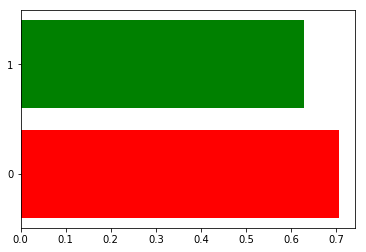

****************** Self_Employed *******************
Other
barplot
Number of time value: 0 appears in Self_Employed is 414
and the loan was accepted : 289 times for this , the rate is : 0.6980676328502415
Number of time value: 1 appears in Self_Employed is 66
and the loan was accepted : 43 times for this , the rate is : 0.6515151515151515


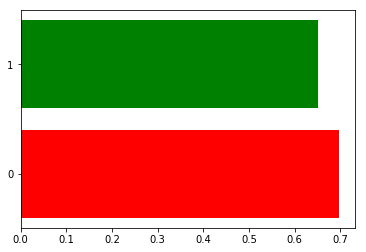

****************** ApplicantIncome *******************
numeric
boxplot


<Figure size 432x288 with 0 Axes>

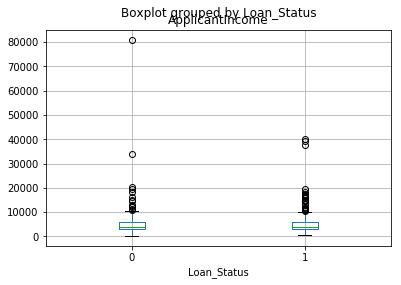

****************** CoapplicantIncome *******************
numeric
boxplot


<Figure size 432x288 with 0 Axes>

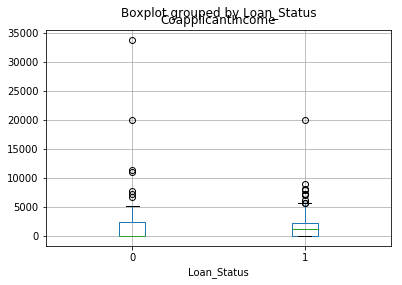

****************** LoanAmount *******************
numeric
boxplot


<Figure size 432x288 with 0 Axes>

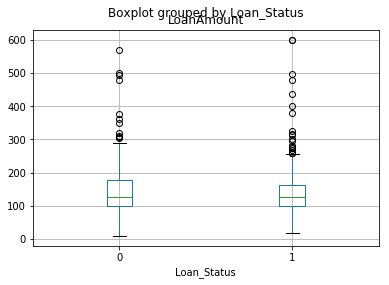

****************** Loan_Amount_Term *******************
numeric
boxplot


<Figure size 432x288 with 0 Axes>

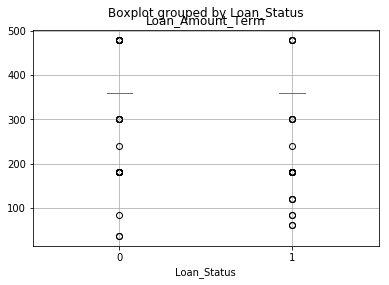

****************** Credit_History *******************
numeric
boxplot


<Figure size 432x288 with 0 Axes>

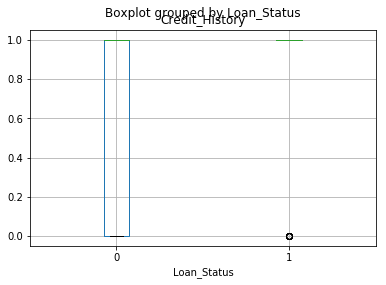

****************** PA_Rural *******************
Other
barplot
Number of time value: 1 appears in PA_Rural is 139
and the loan was accepted : 85 times for this , the rate is : 0.6115107913669064
Number of time value: 0 appears in PA_Rural is 341
and the loan was accepted : 247 times for this , the rate is : 0.7243401759530792


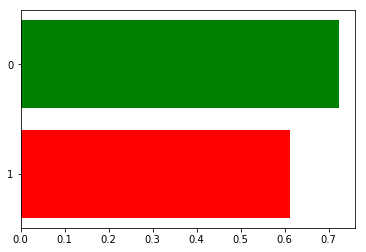

****************** PA_Semiurban *******************
Other
barplot
Number of time value: 0 appears in PA_Semiurban is 289
and the loan was accepted : 183 times for this , the rate is : 0.6332179930795848
Number of time value: 1 appears in PA_Semiurban is 191
and the loan was accepted : 149 times for this , the rate is : 0.7801047120418848


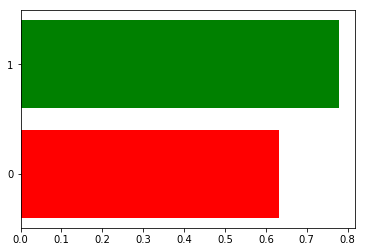

****************** PA_Urban *******************
Other
barplot
Number of time value: 0 appears in PA_Urban is 330
and the loan was accepted : 234 times for this , the rate is : 0.7090909090909091
Number of time value: 1 appears in PA_Urban is 150
and the loan was accepted : 98 times for this , the rate is : 0.6533333333333333


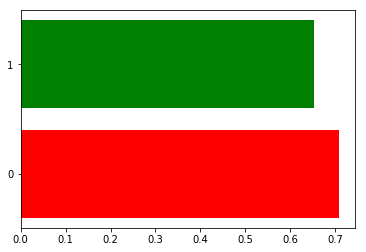

****************** Dep_0 *******************
Other
barplot
Number of time value: 0 appears in Dep_0 is 206
and the loan was accepted : 145 times for this , the rate is : 0.7038834951456311
Number of time value: 1 appears in Dep_0 is 274
and the loan was accepted : 187 times for this , the rate is : 0.6824817518248175


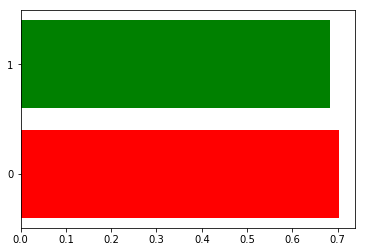

****************** Dep_1 *******************
Other
barplot
Number of time value: 1 appears in Dep_1 is 80
and the loan was accepted : 52 times for this , the rate is : 0.65
Number of time value: 0 appears in Dep_1 is 400
and the loan was accepted : 280 times for this , the rate is : 0.7


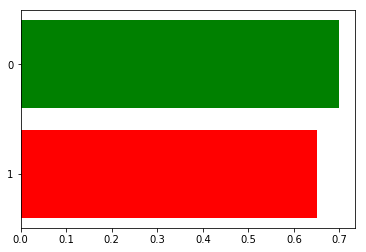

****************** Dep_2 *******************
Other
barplot
Number of time value: 0 appears in Dep_2 is 395
and the loan was accepted : 267 times for this , the rate is : 0.6759493670886076
Number of time value: 1 appears in Dep_2 is 85
and the loan was accepted : 65 times for this , the rate is : 0.7647058823529411


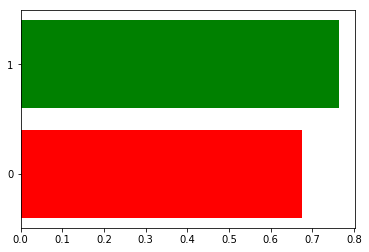

****************** Dep_3+ *******************
Other
barplot
Number of time value: 0 appears in Dep_3+ is 439
and the loan was accepted : 304 times for this , the rate is : 0.6924829157175398
Number of time value: 1 appears in Dep_3+ is 41
and the loan was accepted : 28 times for this , the rate is : 0.6829268292682927


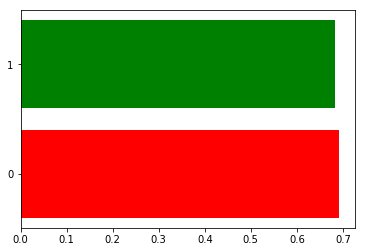

In [46]:
import time
for col in df.drop('Loan_Status', axis=1):
    
    print(f'****************** {col} *******************')
    
    if (df[col].dtype == np.float64 or df[col].dtype == np.int64):
        print('numeric')
        make_box_plot(df,col)
    else: 
        print('Other')
        make_bar_plot(df,col)
    time.sleep(0.1)

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [19]:
df = pd.get_dummies(df, prefix=['PA', 'Dep'], columns=['Property_Area', 'Dependents'])

print the head of df

In [20]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,PA_Rural,PA_Semiurban,PA_Urban,Dep_0,Dep_1,Dep_2,Dep_3+
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [21]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [22]:
for col in df.columns: # Loop through all columns in predictors
    if df[col].dtype == 'object':  # check if column's type is object (text)
        df[col] = pd.Categorical(df[col]).codes  # convert text to numerical

Print the head of df

In [23]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,PA_Rural,PA_Semiurban,PA_Urban,Dep_0,Dep_1,Dep_2,Dep_3+
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [24]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [25]:
y = pd.DataFrame({"Loan_Status" : df["Loan_Status"]})
X = df.drop(columns='Loan_Status')
print (X.columns)
print (y.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'PA_Rural', 'PA_Semiurban', 'PA_Urban', 'Dep_0', 'Dep_1', 'Dep_2',
       'Dep_3+'],
      dtype='object')
Index(['Loan_Status'], dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (336, 16) (336, 1)
test shape (144, 16) (144, 1)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [27]:
from sklearn.linear_model import LogisticRegression

logic_rf = LogisticRegression()
logic_rf.fit(X_train, y_train)
train_score = logic_rf.score(X_train, y_train)
test_score = logic_rf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8035714285714286
test accuracy = 0.7986111111111112


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [28]:
from sklearn import metrics
y_pred = logic_rf.predict(X_test)
C = metrics.confusion_matrix(y_test, y_pred)
print(C)

[[22 25]
 [ 4 93]]


In [29]:
precision_0 =C[0,0]/(C[0,0]+C[1,0])
recall_1 = C[1,1]/(C[1,1]+C[1,0])    

print (f'precision_0 ={precision_0}')
print (f'recall_1 ={recall_1}')

precision_0 =0.8461538461538461
recall_1 =0.9587628865979382


10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [30]:
from sklearn.model_selection import cross_val_score
logic_lf = LogisticRegression(random_state=123, fit_intercept = False)
scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv=5)
print (scores)
print ('scores mean =', round(scores.mean(),3) ,'scores std =', round(scores.std(),3))

NameError: name 'clf' is not defined

how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.